In [1]:
# Load libraries

suppressPackageStartupMessages(library(openxlsx))
suppressPackageStartupMessages(library(ggvenn))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(dplyr))

In [2]:
# define directory

main_dir <- "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Tables/Supplementary/"
save_fig <- "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/"
setwd(main_dir)
getwd()

[1] "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Tables/Supplementary"

In [3]:
# read DEGs table and find unique ones

mitosis_degs <- read.xlsx("Differentially expressed genes.xlsx",
                           sheet = "Common_DEGs_MITOSISi",
                          startRow = 1)
mitosis_unique_degs <-mitosis_degs[mitosis_degs$Frequency == 1,]$Gene.Symbol

cytoskeleton_degs <- read.xlsx("Differentially expressed genes.xlsx",
                           sheet = "Common_DEGs_CYTOi",
                          startRow = 1)
cytoskeleton_unique_degs <-cytoskeleton_degs[cytoskeleton_degs$Frequency == 1,]$Gene.Symbol

dna_replication_degs <- read.xlsx("Differentially expressed genes.xlsx",
                           sheet = "Common_DEGs_DNA_REPi",
                          startRow = 1)
dna_replication_unique_degs <-dna_replication_degs[dna_replication_degs$Frequency == 1,]$Gene_Symbol

egfr_degs <- read.xlsx("Differentially expressed genes.xlsx",
                           sheet = "Common_DEGs_EGFRi",
                          startRow = 1)
egfr_unique_degs <-egfr_degs[egfr_degs$Frequency == 1,]$Gene.Symbol

cetuximab_degs <- read.xlsx("Differentially expressed genes.xlsx",
                           sheet = "Cetuximab_EGFRi",
                          startRow = 1)
cetuximab_unique_degs <-cetuximab_degs$Gene_Symbol

In [4]:
# read enriched terms found under the first and second strategies

mitosis_strategy1 <- read.xlsx("Enriched_terms (MITOSISi, Paclitaxel).xlsx",
                           sheet = "EMC_MITOSISi_Paclitaxel_S1",
                          startRow = 2)
cytoskeleton_strategy1 <- read.xlsx("Enriched_terms (CYTOi, Paclitaxel).xlsx",
                           sheet = "EMC_CYTOi_Paclitaxel_S1",
                          startRow = 2)
dna_replication_fluorouracil_strategy1 <- read.xlsx("Enriched_terms (DNA_REPi, 5-FU).xlsx",
                           sheet = "EM_DNA_REPi_5-FU_S1",
                          startRow = 2)
dna_replication_gemcitabine_strategy1 <- read.xlsx("Enriched_terms (DNA_REPi, Gemcitabine).xlsx",
                           sheet = "EM_DNA_REPi_Gemcitabine_S1",
                          startRow = 2)
egfr_strategy1 <- read.xlsx("Enriched_terms (EGFRi, Cetuximab).xlsx",
                           sheet = "EM_EGFRi_Cetuximab_S1",
                          startRow = 2)


mitosis_strategy2 <- read.xlsx("Enriched_terms (MITOSISi, Paclitaxel).xlsx",
                           sheet = "EM_MITOSISi_Paclitaxel_S2",
                          startRow = 2)
cytoskeleton_strategy2 <- read.xlsx("Enriched_terms (CYTOi, Paclitaxel).xlsx",
                           sheet = "EC_CYTOi_Paclitaxel_S2",
                          startRow = 2)
dna_replication_fluorouracil_strategy2 <- read.xlsx("Enriched_terms (DNA_REPi, 5-FU).xlsx",
                           sheet = "EM_DNA_REPi_5-FU_S2",
                          startRow = 2)
dna_replication_gemcitabine_strategy2 <- read.xlsx("Enriched_terms (DNA_REPi, Gemcitabine).xlsx",
                           sheet = "EC_DNA_REPi_Gemcitabine_S2",
                          startRow = 2)
egfr_strategy2 <- read.xlsx("Enriched_terms (EGFRi, Cetuximab).xlsx",
                           sheet = "EM_EGFRi_Cetuximab_S2",
                          startRow = 2)

head(mitosis_strategy2, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,hsa04512,ECM-receptor interaction,9.1835578,25,0.0408163,1.8e-09,1.8e-09,NA,"LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP"
2,hsa04510,Focal adhesion,4.5371148,25,0.1428571,3.4e-09,3.4e-09,NA,"ITGA2, ITGAV, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC"
3,hsa04115,p53 signaling pathway,5.4445378,25,0.0204082,4.5e-08,4.5e-08,NA,"SFN, THBS1, SERPINE1, PPP1R13L"


In [5]:
# find upregulated and downregulated genes (MITOSISi)

up_mitosis_strategy1 <- na.omit(unique(mitosis_strategy1$Up_regulated))
down_mitosis_strategy1 <- na.omit(unique(mitosis_strategy1$Down_regulated))
terms_mitosis_strategy1 <- c(up_mitosis_strategy1, down_mitosis_strategy1)

split_mitosis_terms1 <- unlist(strsplit(terms_mitosis_strategy1, ", "))
unique_mitosis_terms1 <- unique(split_mitosis_terms1)

up_mitosis_strategy2 <- na.omit(unique(mitosis_strategy2$Up_regulated))
down_mitosis_strategy2 <- na.omit(unique(mitosis_strategy2$Down_regulated))
terms_mitosis_strategy2 <- c(up_mitosis_strategy2, down_mitosis_strategy2)

split_mitosis_terms2 <- unlist(strsplit(terms_mitosis_strategy2, ", "))
unique_mitosis_terms2 <- unique(split_mitosis_terms2)

unique_terms_mitosis_strategy1 <- setdiff(unique_mitosis_terms1, unique_mitosis_terms2)

unique_degs_mitosis_paclitaxel <- intersect(unique_terms_mitosis_strategy1, mitosis_unique_degs)
unique_degs_mitosis_paclitaxel

[1] "FYN"     "LDHB"    "ODC1"    "FLNB"    "KRT13"   "KRT14"   "JUP"    
 [8] "CYP24A1" "ADRB2"   "LYPD6B"  "MMP7"

In [6]:
# find upregulated and downregulated genes (CYTOi)

up_cytoskeleton_strategy1 <- na.omit(unique(cytoskeleton_strategy1$Up_regulated))
down_cytoskeleton_strategy1 <- na.omit(unique(cytoskeleton_strategy1$Down_regulated))
terms_cytoskeleton_strategy1 <- c(up_cytoskeleton_strategy1, down_cytoskeleton_strategy1)

split_cytoskeleton_terms1 <- unlist(strsplit(terms_cytoskeleton_strategy1, ", "))
unique_cytoskeleton_terms1 <- unique(split_cytoskeleton_terms1)

up_cytoskeleton_strategy2 <- na.omit(unique(cytoskeleton_strategy2$Up_regulated))
down_cytoskeleton_strategy2 <- na.omit(unique(cytoskeleton_strategy2$Down_regulated))
terms_cytoskeleton_strategy2 <- c(up_cytoskeleton_strategy2, down_cytoskeleton_strategy2)

split_cytoskeleton_terms2 <- unlist(strsplit(terms_cytoskeleton_strategy2, ", "))
unique_cytoskeleton_terms2 <- unique(split_cytoskeleton_terms2)

unique_terms_cytoskeleton_strategy1 <- setdiff(unique_cytoskeleton_terms1, unique_cytoskeleton_terms2)

unique_degs_cytoskeleton_paclitaxel <- intersect(unique_terms_cytoskeleton_strategy1, cytoskeleton_unique_degs)
unique_degs_cytoskeleton_paclitaxel

[1] "FYN"      "LDHB"     "FLNB"     "MYL9"     "EDN1"     "ARHGAP29"
 [7] "CYP24A1"  "NFKBIZ"   "LYPD6B"   "MMP7"

In [7]:
# find upregulated and downregulated genes (DNA_REPi, 5-FU)

up_dna_replication_fluorouracil_strategy1 <- na.omit(unique(dna_replication_fluorouracil_strategy1$Up_regulated))
down_dna_replication_fluorouracil_strategy1 <- na.omit(unique(dna_replication_fluorouracil_strategy1$Down_regulated))
terms_dna_replication_fluorouracil_strategy1 <- c(up_dna_replication_fluorouracil_strategy1, down_dna_replication_fluorouracil_strategy1)

split_dna_replication_fluorouracil_terms1 <- unlist(strsplit(terms_dna_replication_fluorouracil_strategy1, ", "))
unique_dna_replication_fluorouracil_terms1 <- unique(split_dna_replication_fluorouracil_terms1)

up_dna_replication_fluorouracil_strategy2 <- na.omit(unique(dna_replication_fluorouracil_strategy2$Up_regulated))
down_dna_replication_fluorouracil_strategy2 <- na.omit(unique(dna_replication_fluorouracil_strategy2$Down_regulated))
terms_dna_replication_fluorouracil_strategy2 <- c(up_dna_replication_fluorouracil_strategy2, down_dna_replication_fluorouracil_strategy2)

split_dna_replication_fluorouracil_terms2 <- unlist(strsplit(terms_dna_replication_fluorouracil_strategy2, ", "))
unique_dna_replication_fluorouracil_terms2 <- unique(split_dna_replication_fluorouracil_terms2)

unique_terms_dna_replication_fluorouracil_strategy1 <- setdiff(unique_dna_replication_fluorouracil_terms1, unique_dna_replication_fluorouracil_terms2)

unique_degs_fluorouracil <- intersect(unique_terms_dna_replication_fluorouracil_strategy1, dna_replication_unique_degs)
unique_degs_fluorouracil

[1] "PINK1"    "MAGED1"   "LYN"      "PREX1"    "TNFSF13B" "CASP1"    "MYO1F"   
[8] "KLK1"

In [8]:
# find upregulated and downregulated genes (DNA_REPi, Gemcitabine)

up_dna_replication_gemcitabine_strategy1 <- na.omit(unique(dna_replication_gemcitabine_strategy1$Up_regulated))
down_dna_replication_gemcitabine_strategy1 <- na.omit(unique(dna_replication_gemcitabine_strategy1$Down_regulated))
terms_dna_replication_gemcitabine_strategy1 <- c(up_dna_replication_gemcitabine_strategy1, down_dna_replication_gemcitabine_strategy1)

split_dna_replication_gemcitabine_terms1 <- unlist(strsplit(terms_dna_replication_gemcitabine_strategy1, ", "))
unique_dna_replication_gemcitabine_terms1 <- unique(split_dna_replication_gemcitabine_terms1)

up_dna_replication_gemcitabine_strategy2 <- na.omit(unique(dna_replication_gemcitabine_strategy2$Up_regulated))
down_dna_replication_gemcitabine_strategy2 <- na.omit(unique(dna_replication_gemcitabine_strategy2$Down_regulated))
terms_dna_replication_gemcitabine_strategy2 <- c(up_dna_replication_gemcitabine_strategy2, down_dna_replication_gemcitabine_strategy2)

split_dna_replication_gemcitabine_terms2 <- unlist(strsplit(terms_dna_replication_gemcitabine_strategy2, ", "))
unique_dna_replication_gemcitabine_terms2 <- unique(split_dna_replication_gemcitabine_terms2)

unique_terms_dna_replication_gemcitabine_strategy1 <- setdiff(unique_dna_replication_gemcitabine_terms1, unique_dna_replication_gemcitabine_terms2)

unique_degs_gemcitabine <- intersect(unique_terms_dna_replication_gemcitabine_strategy1, dna_replication_unique_degs)
unique_degs_gemcitabine

character(0)

In [9]:
# find upregulated and downregulated genes (EGFRi)

up_egfr_strategy1 <- na.omit(unique(egfr_strategy1$Up_regulated))
down_egfr_strategy1 <- na.omit(unique(egfr_strategy1$Down_regulated))
terms_egfr_strategy1 <- c(up_egfr_strategy1, down_egfr_strategy1)

split_egfr_terms1 <- unlist(strsplit(terms_egfr_strategy1, ", "))
unique_egfr_terms1 <- unique(split_egfr_terms1)

up_egfr_strategy2 <- na.omit(unique(egfr_strategy2$Up_regulated))
down_egfr_strategy2 <- na.omit(unique(egfr_strategy2$Down_regulated))
terms_egfr_strategy2 <- c(up_egfr_strategy2, down_egfr_strategy2)

split_egfr_terms2 <- unlist(strsplit(terms_egfr_strategy2, ", "))
unique_egfr_terms2 <- unique(split_egfr_terms2)

unique_terms_egfr_strategy1 <- setdiff(unique_egfr_terms1, unique_egfr_terms2)

unique_degs_cetuximab <- intersect(unique_terms_egfr_strategy1, egfr_unique_degs)
unique_degs_cetuximab <- intersect(unique_degs_cetuximab, cetuximab_unique_degs)
unique_degs_cetuximab

character(0)

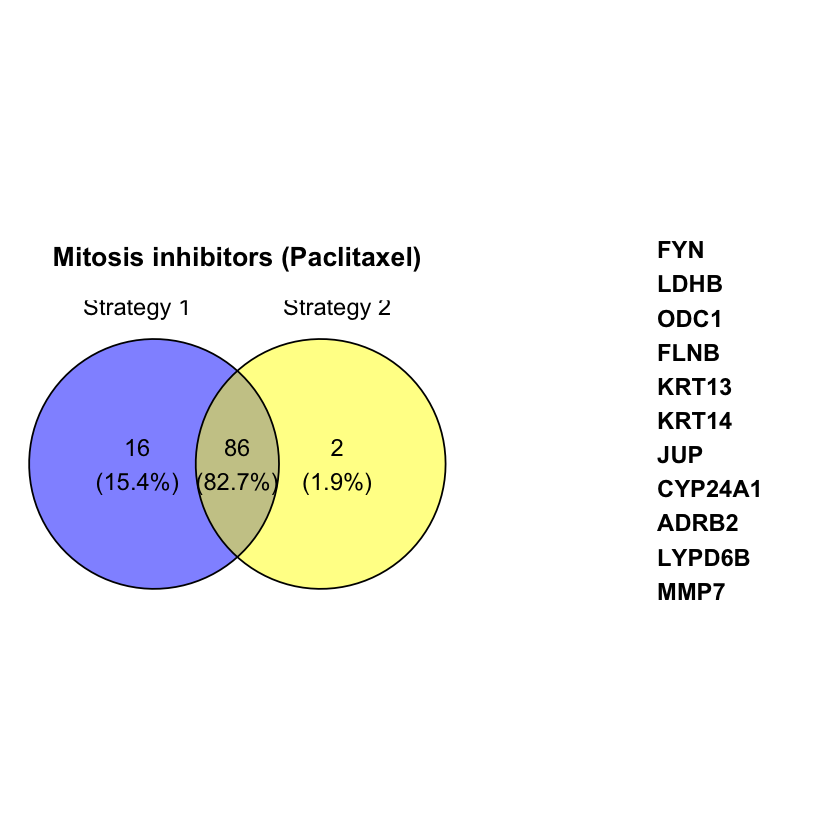

In [10]:
# Extract unique "Term_Description" values from both dataframes
set1 <- unique(mitosis_strategy1$Term_Description)
set2 <- unique(mitosis_strategy2$Term_Description)

# Create a list for the Venn diagram
venn_data <- list("Strategy 1" = set1, "Strategy 2" = set2)

# Generate Venn diagram with no margins
venn_plot <- ggvenn(venn_data, 
                     stroke_size = 0.5, 
                     text_size = 5,
                     set_name_size = 5) +
  ggtitle("Mitosis inhibitors (Paclitaxel)\n") +  
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    plot.margin = margin(0, 0, 0, 0)  
  )

# Concatenate terms without space
terms_text <- paste(unique_degs_mitosis_paclitaxel, collapse = "\n")

# Create text plot with no margins
text_plot <- ggplot() +
  annotate("text", x = 0.2, y = 1, label = terms_text, size = 5, fontface = "bold", hjust = 0) +
  theme_void() 

# Arrange Venn diagram and text side by side with tighter spacing
combined_plot_mitosis <- grid.arrange(
  venn_plot, text_plot, 
  ncol = 2, 
  widths = c(1.3, 1),  
  respect = TRUE  
) 

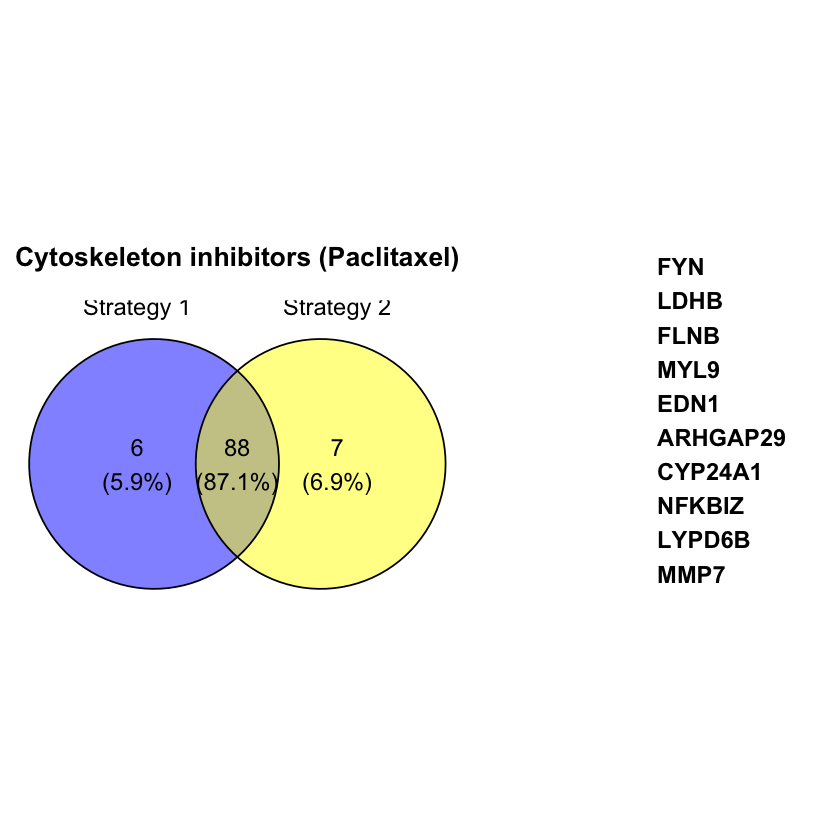

In [11]:
# Extract unique "Term_Description" values from both dataframes
set1 <- unique(cytoskeleton_strategy1$Term_Description)
set2 <- unique(cytoskeleton_strategy2$Term_Description)

# Create a list for the Venn diagram
venn_data <- list("Strategy 1" = set1, "Strategy 2" = set2)

# Define unique terms to be displayed on the right
unique_terms_text <- paste(unique_degs_cytoskeleton_paclitaxel, collapse = "\n")  

# Generate Venn diagram
venn_plot <- ggvenn(venn_data, 
                     stroke_size = 0.5, 
                     text_size = 5,
                     set_name_size = 5) +
  ggtitle("Cytoskeleton inhibitors (Paclitaxel)\n") +  
  theme(plot.title = element_text(face = "bold", size = 16, hjust = 0.5))

# Concatenate all terms into a single string (no space between terms)
terms_text <- paste(unique_degs_cytoskeleton_paclitaxel, collapse = "\n")

# Create text plot with a single block of text
text_plot <- ggplot() +
  annotate("text", x = 0.2, y = 1, label = terms_text, size = 5, fontface = "bold", hjust = 0) +
  theme_void() 

# Arrange Venn diagram and text side by side
combined_plot_cytoskeleton <- grid.arrange(
  venn_plot, text_plot, 
  ncol = 2, 
  widths = c(1.3, 1),  
  respect = TRUE  
) 


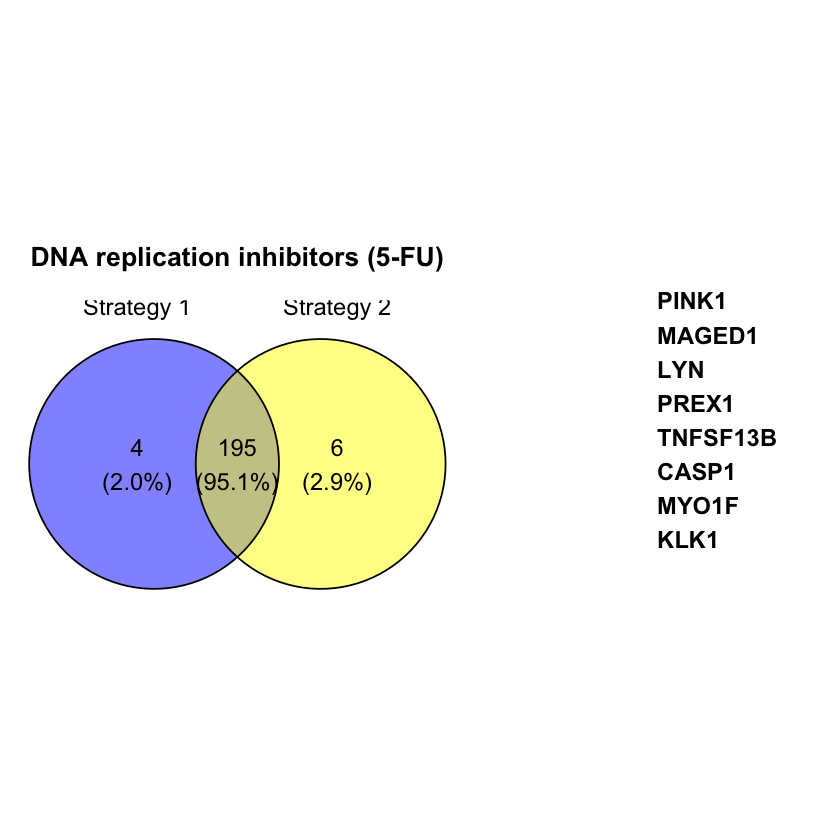

In [12]:
# Extract unique "Term_Description" values from both dataframes
set1 <- unique(dna_replication_fluorouracil_strategy1$Term_Description)
set2 <- unique(dna_replication_fluorouracil_strategy2$Term_Description)

# Create a list for the Venn diagram
venn_data <- list("Strategy 1" = set1, "Strategy 2" = set2)

# Define unique terms to be displayed on the right
unique_terms_text <- paste(unique_degs_fluorouracil, collapse = "\n")  

# Generate Venn diagram
venn_plot <- ggvenn(venn_data, 
                     stroke_size = 0.5, 
                     text_size = 5,
                     set_name_size = 5) +
  ggtitle("DNA replication inhibitors (5-FU)\n") +  
  theme(plot.title = element_text(face = "bold", size = 16, hjust = 0.5))

# Concatenate all terms into a single string (no space between terms)
terms_text <- paste(unique_degs_fluorouracil, collapse = "\n")

# Create text plot with a single block of text
text_plot <- ggplot() +
  annotate("text", x = 0.2, y = 1, label = terms_text, size = 5, fontface = "bold", hjust = 0) +
  theme_void()  

# Arrange Venn diagram and text side by side
combined_plot_fluorouracil <- grid.arrange(
  venn_plot, text_plot, 
  ncol = 2, 
  widths = c(1.3, 1),  
  respect = TRUE  
) 

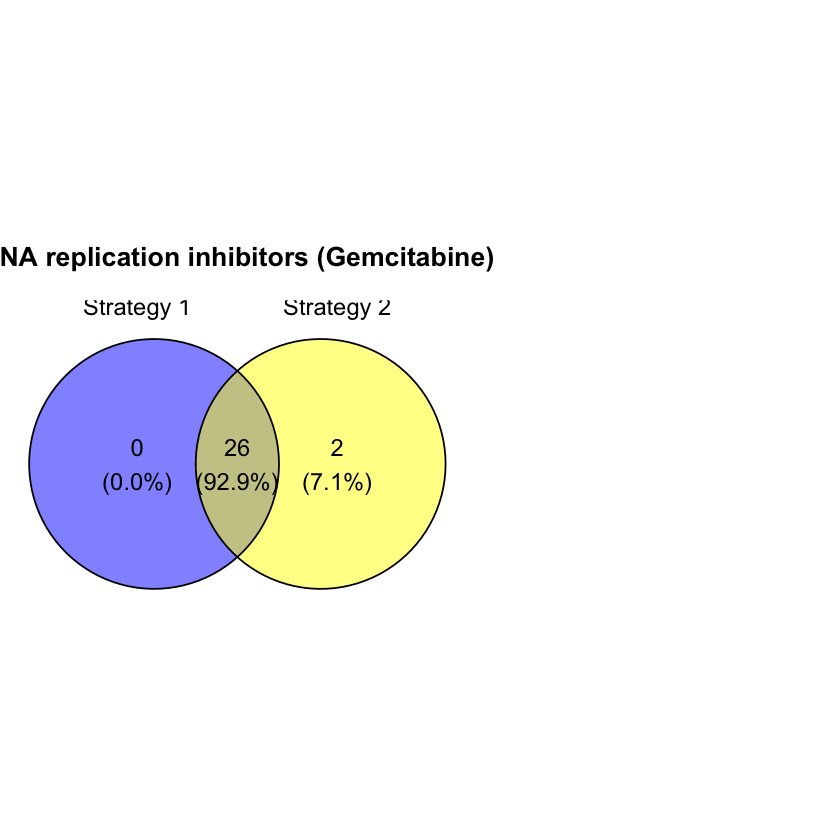

In [13]:
# Extract unique "Term_Description" values from both dataframes
set1 <- unique(dna_replication_gemcitabine_strategy1$Term_Description)
set2 <- unique(dna_replication_gemcitabine_strategy2$Term_Description)

# Create a list for the Venn diagram
venn_data <- list("Strategy 1" = set1, "Strategy 2" = set2)

# Define unique terms to be displayed on the right
unique_terms_text <- paste(unique_degs_gemcitabine, collapse = "\n")  

# Generate Venn diagram
venn_plot <- ggvenn(venn_data, 
                     stroke_size = 0.5, 
                     text_size = 5,
                     set_name_size = 5) +
  ggtitle("DNA replication inhibitors (Gemcitabine)\n") +  
  theme(plot.title = element_text(face = "bold", size = 16, hjust = 0.5))

# Concatenate all terms into a single string (no space between terms)
terms_text <- paste(unique_degs_gemcitabine, collapse = "\n")

# Create text plot with a single block of text
text_plot <- ggplot() +
  annotate("text", x = 0.2, y = 1, label = terms_text, size = 5, fontface = "bold", hjust = 0) +
  theme_void()  

# Arrange Venn diagram and text side by side
combined_plot_gemcitabine <- grid.arrange(
  venn_plot, text_plot, 
  ncol = 2, 
  widths = c(1.3, 1),  
  respect = TRUE  
) 


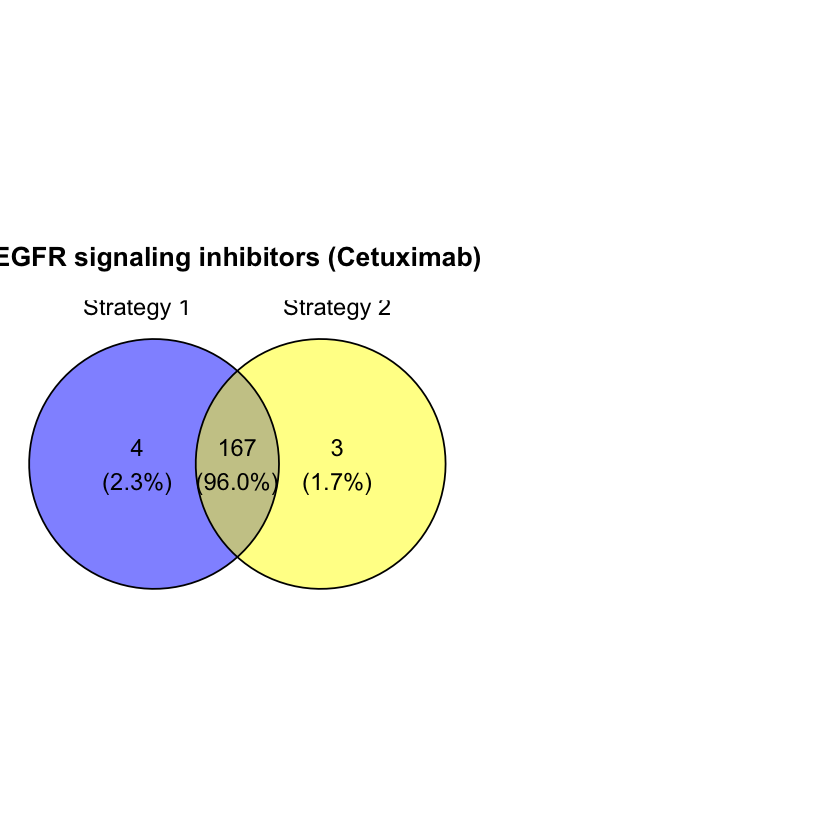

In [14]:
# Extract unique "Term_Description" values from both dataframes
set1 <- unique(egfr_strategy1$Term_Description)
set2 <- unique(egfr_strategy2$Term_Description)

# Create a list for the Venn diagram
venn_data <- list("Strategy 1" = set1, "Strategy 2" = set2)

# Define unique terms to be displayed on the right
unique_terms_text <- paste(unique_degs_cetuximab, collapse = "\n")  

# Generate Venn diagram
venn_plot <- ggvenn(venn_data, 
                     stroke_size = 0.5, 
                     text_size = 5,
                     set_name_size = 5) +
  ggtitle("EGFR signaling inhibitors (Cetuximab)\n") +  
  theme(plot.title = element_text(face = "bold", size = 16, hjust = 0.5))

# Concatenate all terms into a single string (no space between terms)
terms_text <- paste(unique_degs_cetuximab, collapse = "\n")

# Create text plot with a single block of text
text_plot <- ggplot() +
  annotate("text", x = 0.2, y = 1, label = terms_text, size = 5, fontface = "bold", hjust = 0) +
  theme_void()  

# Arrange Venn diagram and text side by side
combined_plot_egfr <- grid.arrange(
  venn_plot, text_plot, 
  ncol = 2, 
  widths = c(1.3, 1),  
  respect = TRUE  
) 


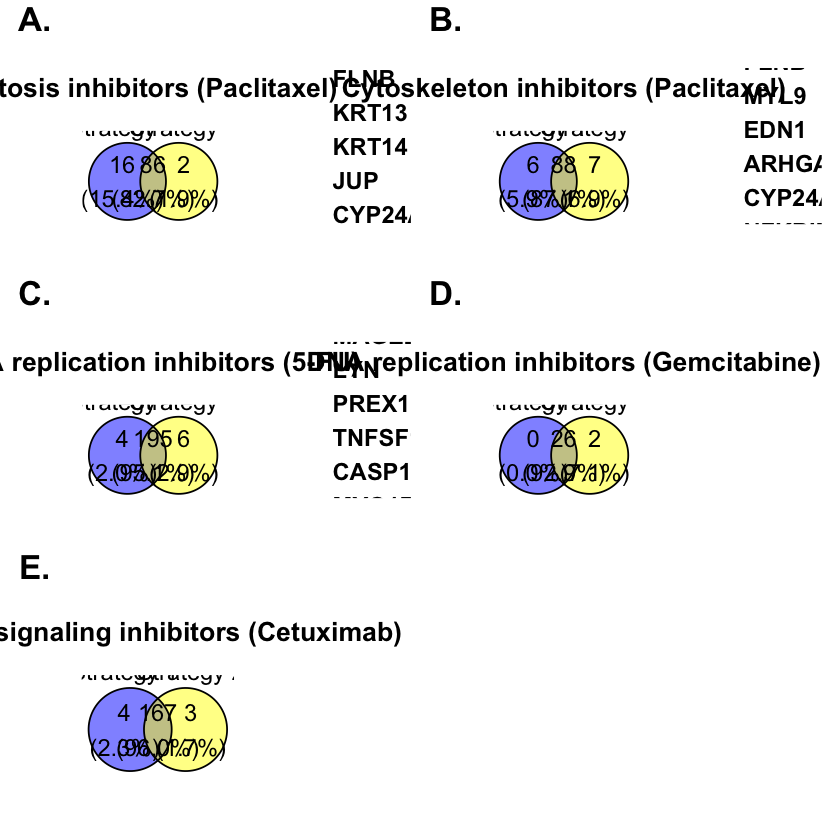

In [15]:
# Define subplot variables manually
plot_a <- combined_plot_mitosis
plot_b <- combined_plot_cytoskeleton
plot_c <- combined_plot_fluorouracil
plot_d <- combined_plot_gemcitabine
plot_e <- combined_plot_egfr
plot_f <- plot_spacer()  

# Reduce spacing between plots and tags
tag_style <- theme(
  plot.tag = element_text(face = 'bold', size = 20, margin = margin(-15, 0, -15, 0))  
)

# Create the 3×2 grid layout with reduced tag spacing
grid_plot <- ((wrap_elements(plot_a) + wrap_elements(plot_b)) /
             (wrap_elements(plot_c) + wrap_elements(plot_d)) /
             (wrap_elements(plot_e) + plot_f)) +  
  plot_layout(
    widths = c(1, 1),   
    heights = c(1, 1, 1) 
  ) +
  plot_annotation(
    tag_levels = "A",  
    tag_prefix = "",   
    tag_suffix = ".",  
    tag_sep = unit(-15, "pt") 
  ) & 
  tag_style  

# Save the figure 
ggsave(
  filename = paste0(save_fig,"/Figure 6.jpeg"),
  plot = grid_plot,
  width = 22,   
  height = 12,  
  device = "jpeg"
)

# Show the final grid plot
print(grid_plot)

In [16]:
# find common terms between MITOSISi and CYTOi, calculate spearman correlation

common_terms <- mitosis_strategy1$ID %in% cytoskeleton_strategy1$ID

mitosis_common <- mitosis_strategy1[common_terms, ]
cytoskeleton_common <- cytoskeleton_strategy1[common_terms, ]

# Merge dataframes based on "ID" column
merged_df <- inner_join(mitosis_common, cytoskeleton_common, by = "ID", suffix = c("_mitosis", "_cytoskeleton"))

# Compute Spearman rank correlation
spearman_corr <- cor(as.numeric(merged_df$lowest_p_mitosis), as.numeric(merged_df$lowest_p_cytoskeleton), method = "spearman")
spearman_test <- cor.test(as.numeric(merged_df$lowest_p_mitosis), as.numeric(merged_df$lowest_p_cytoskeleton), method = "spearman")

cat("Spearman Correlation: ", spearman_test$estimate, "\n")
cat("P-value: ", spearman_test$p.value, "\n")

Warning message in cor.test.default(as.numeric(merged_df$lowest_p_mitosis), as.numeric(merged_df$lowest_p_cytoskeleton), :
“Cannot compute exact p-value with ties”


Spearman Correlation:  0.9252894 
P-value:  6.920075e-33 


In [17]:
# write common terms between MITOSISi and CYTOi (Paclitaxel)

write.table(merged_df,
            paste0(main_dir, "Common_terms_MITOSISi_CYTOi (Paclitaxel).tsv"),
            row.names= FALSE,
            quote = FALSE,
            sep = "\t")  